In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import names
from nltk.sentiment import SentimentAnalyzer, SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings("ignore")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [64]:
Data = pd.read_csv("amazon_reviews.csv")
Data.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


# Data Preprocessing

In [65]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4915 non-null   int64  
 1   reviewerName          4914 non-null   object 
 2   overall               4915 non-null   float64
 3   reviewText            4914 non-null   object 
 4   reviewTime            4915 non-null   object 
 5   day_diff              4915 non-null   int64  
 6   helpful_yes           4915 non-null   int64  
 7   helpful_no            4915 non-null   int64  
 8   total_vote            4915 non-null   int64  
 9   score_pos_neg_diff    4915 non-null   int64  
 10  score_average_rating  4915 non-null   float64
 11  wilson_lower_bound    4915 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 460.9+ KB


In [66]:
Data.columns

Index(['Unnamed: 0', 'reviewerName', 'overall', 'reviewText', 'reviewTime',
       'day_diff', 'helpful_yes', 'helpful_no', 'total_vote',
       'score_pos_neg_diff', 'score_average_rating', 'wilson_lower_bound'],
      dtype='object')

In [67]:
Data.isnull().sum()

Unnamed: 0              0
reviewerName            1
overall                 0
reviewText              1
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64

In [68]:
Data.dropna().sum()

Unnamed: 0                                                       12076030
reviewerName            0mie1K31m22&amp;1/2Men2Cents!2K1Toaster35-year...
overall                                                           22539.0
reviewText              Purchased this for my device, it worked as adv...
reviewTime              2013-10-252012-12-232013-11-212013-07-132013-0...
day_diff                                                          2148682
helpful_yes                                                          6442
helpful_no                                                           1033
total_vote                                                           7475
score_pos_neg_diff                                                   5409
score_average_rating                                           370.259626
wilson_lower_bound                                              98.352501
dtype: object

In [69]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,4915.0,2457.000000,1418.982617,0.0,1228.5,2457.0,3685.5,4914.000000
overall,4915.0,4.587589,0.996845,1.0,5.0,5.0,5.0,5.000000
day_diff,4915.0,437.367040,209.439871,1.0,281.0,431.0,601.0,1064.000000
helpful_yes,4915.0,1.311089,41.619161,0.0,0.0,0.0,0.0,1952.000000
helpful_no,4915.0,0.210376,4.023296,0.0,0.0,0.0,0.0,183.000000
total_vote,4915.0,1.521465,44.123095,0.0,0.0,0.0,0.0,2020.000000
score_pos_neg_diff,4915.0,1.100712,39.367949,-130.0,0.0,0.0,0.0,1884.000000
score_average_rating,4915.0,0.075468,0.256062,0.0,0.0,0.0,0.0,1.000000
wilson_lower_bound,4915.0,0.020053,0.077187,0.0,0.0,0.0,0.0,0.957544


In [70]:
text = "I travel most of the day's in bus to college, I also take my bike if the college is for only half a day"
text=re.sub('[^a-zA-Z]','',text)
print(text)

ItravelmostofthedaysinbustocollegeIalsotakemybikeifthecollegeisforonlyhalfaday


In [71]:
tokens=nltk.word_tokenize(text)

In [72]:
#removing stopwords
stop_words=set(stopwords.words('english'))
filtered_tokens = [token for token in tokens if token.lower() not in stop_words]

In [73]:
Data.count()

Unnamed: 0              4915
reviewerName            4914
overall                 4915
reviewText              4914
reviewTime              4915
day_diff                4915
helpful_yes             4915
helpful_no              4915
total_vote              4915
score_pos_neg_diff      4915
score_average_rating    4915
wilson_lower_bound      4915
dtype: int64

In [74]:
#removing duplicates
Data.drop_duplicates(inplace=True)

In [75]:
#Fill missing values with Zero
Data = Data.fillna(0)


In [76]:
Data.isnull().sum()

Unnamed: 0              0
reviewerName            0
overall                 0
reviewText              0
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64

# EDA

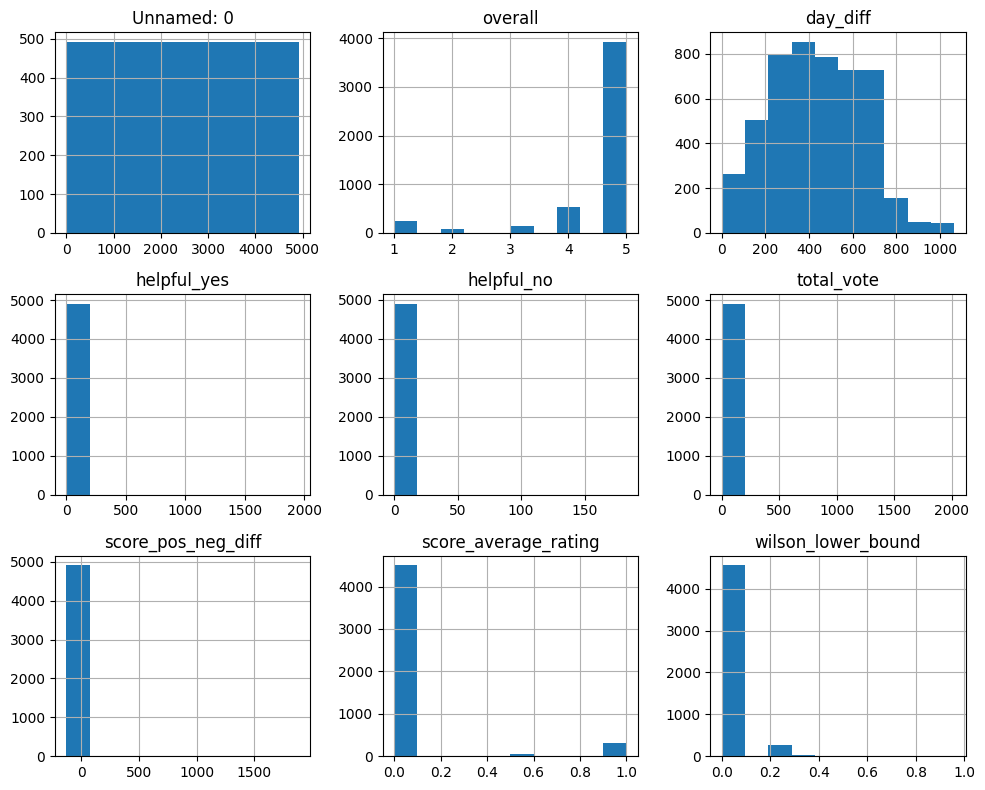

In [77]:
#plot histograms for numeric variables
Data.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

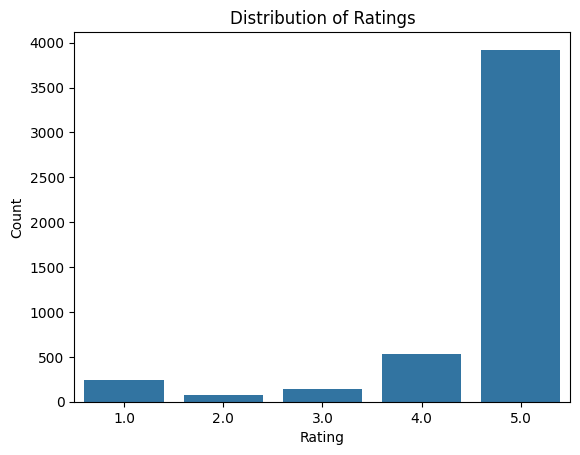

In [78]:
# Plot the count of each category in a categorical variable
sns.countplot(data=Data, x='overall')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

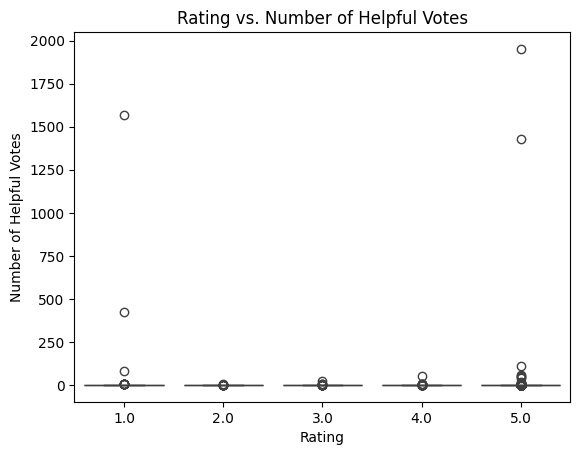

In [79]:
# Explore relationships between categorical variables
sns.boxplot(data=Data, x='overall', y='helpful_yes')
plt.title('Rating vs. Number of Helpful Votes')
plt.xlabel('Rating')
plt.ylabel('Number of Helpful Votes')
plt.show()

# Data Labeling

In [80]:
sentiment = SentimentIntensityAnalyzer()

sia = SentimentIntensityAnalyzer()

# Function to assign sentiment labels using VADER
def assign_sentiment(review):
    sentiment_scores = sia.polarity_scores(str(review))  # Convert to string
    if sentiment_scores['compound'] >= 0.05:
        return 'positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to assign sentiment labels
Data['sentiment'] = Data['reviewText'].apply(assign_sentiment)

# Print positive and negative reviews
print(Data.head(10))

   Unnamed: 0                                      reviewerName  overall  \
0           0                                                 0      4.0   
1           1                                              0mie      5.0   
2           2                                               1K3      4.0   
3           3                                               1m2      5.0   
4           4                                      2&amp;1/2Men      5.0   
5           5                                           2Cents!      5.0   
6           6                                        2K1Toaster      5.0   
7           7  35-year Technology Consumer "8-tracks to 802.11"      5.0   
8           8                                         4evryoung      5.0   
9           9                                          53rdcard      5.0   

                                          reviewText  reviewTime  day_diff  \
0                                         No issues.  2014-07-23       138   
1  Purc

# Train-Test Split

In [81]:
# Split the data into features and labels
X = Data[["reviewText", "reviewTime"]]
y = Data["sentiment"]

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Print the shapes of the training and test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3686, 2)
(1229, 2)
(3686,)
(1229,)


# Naive Bayes Training Model and Model Evaluation

In [82]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score

In [83]:
#split the data into a traoining and test data
X_train, X_test, y_train, y_test = train_test_split(Data["reviewText"], Data["sentiment"], test_size=0.25, random_state=42)

In [84]:
X_train = [str(doc) for doc in X_train]
X_test = [str(doc) for doc in X_test]

vectorizer = TfidfVectorizer(stop_words="english")

# Transform the review text into a TF-IDF matrix
features_train = vectorizer.fit_transform(X_train)
features_test = vectorizer.transform(X_test)


In [85]:
# Create a Naive Bayes classifier object
classifier = MultinomialNB()

# Train the classifier on the training set
classifier.fit(features_train, y_train)

# Predict the sentiment of the test set
predictions = classifier.predict(features_test)

# Evaluate the classifier's performance on the test set
accuracy = accuracy_score(predictions, y_test)
f1 = f1_score(predictions, y_test, average="weighted")


precision = precision_score(predictions, y_test, average="weighted")
recall = recall_score(predictions, y_test, average="weighted")

print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7379983726606998
F1-score: 0.849250936329588
Precision: 1.0
Recall: 0.7379983726606998


# Sentiment Analysis

In [86]:
# Define a function to perform sentiment analysis on new reviews
def analyze_sentiment(review):
    # Transform the review text using the same vectorizer
    review_features = vectorizer.transform([review])
    # Predict the sentiment label using the trained classifier
    sentiment = classifier.predict(review_features)[0]
    return sentiment

# Example usage:
new_review = "This product is amazing! I love it!"
predicted_sentiment = analyze_sentiment(new_review)
print("Predicted sentiment:", predicted_sentiment)


Predicted sentiment: positive
